In [1]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
import numpy as np
import pandas as pd
# Import and read dataset
df = pd.read_csv('E:/Portofolio Randa/Fuel Consumption/dataset/fuel_data.csv')
df.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [2]:
result = df[(df['ENGINE SIZE'] == 3.0) & (df['CYLINDERS'] == 6) & 
            (df['TRANSMISSION'] == 'A4') & (df['FUEL'] == 'X')]
result

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
163,2000,DODGE,CARAVAN,MINIVAN,3.0,6,A4,X,13.0,8.6,11.0,26,253
181,2000,DODGE,GRAND CARAVAN,MINIVAN,3.0,6,A4,X,13.0,8.6,11.0,26,253
262,2000,FORD,RANGER,PICKUP TRUCK - STANDARD,3.0,6,A4,X,14.1,9.5,12.0,24,276
266,2000,FORD,RANGER 4X4,PICKUP TRUCK - STANDARD,3.0,6,A4,X,14.7,10.6,12.9,22,297
270,2000,FORD,TAURUS,MID-SIZE,3.0,6,A4,X,12.1,7.7,10.1,28,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,2007,FORD,TAURUS,MID-SIZE,3.0,6,A4,X,11.8,8.0,10.1,28,232
7182,2008,FORD,ESCAPE,SUV,3.0,6,A4,X,11.7,8.2,10.1,28,232
7184,2008,FORD,ESCAPE AWD,SUV,3.0,6,A4,X,12.2,9.1,10.8,26,248
7492,2008,MAZDA,TRIBUTE,SUV,3.0,6,A4,X,11.7,8.2,10.1,28,232


             FUEL CONSUMPTION
ENGINE SIZE                  
4.1                      13.4
0.8                      13.8
0.9                      22.0
2.1                      42.4
6.3                      51.2
...                       ...
3.6                   16014.6
3.5                   18355.7
5.3                   21336.2
3.0                   25549.9
2.0                   30189.8

[63 rows x 1 columns]


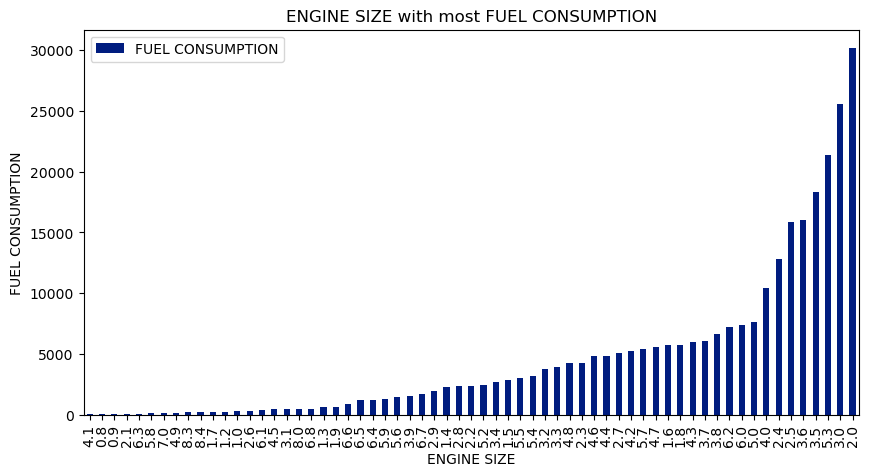

In [3]:
grouped_df = df[['ENGINE SIZE', 'FUEL CONSUMPTION']].groupby('ENGINE SIZE').sum()
grouped_df = grouped_df.sort_values(by='FUEL CONSUMPTION', ascending=True)
data = grouped_df
print(data)
sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('ENGINE SIZE with most FUEL CONSUMPTION')
plt.xlabel('ENGINE SIZE')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

In [4]:
result = df[(df['ENGINE SIZE'] == 4.1) & (df['CYLINDERS'] == 2) & 
            (df['TRANSMISSION'] == 'AM5') & (df['FUEL'] == 'N')]
result

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS


In [5]:
# all_values = df['VEHICLE CLASS'].tolist()

# # Convert all values to lowercase
# lower_values = [x.lower() for x in all_values]

# # Check if there are any duplicates in the lowercase values
# duplicates = set([x for x in lower_values if lower_values.count(x) > 1])

# # Print the result
# if duplicates:
#     print("Found duplicate values:", duplicates)
# else:
#     print("No duplicate values found.")


In [6]:
# df['VEHICLE CLASS'] = df['VEHICLE CLASS'].apply(lambda x: x.upper() if x.lower() in duplicates else x)
# df.head(5)

In [7]:
# grouped_df = df[['VEHICLE CLASS', 'FUEL CONSUMPTION']].groupby('VEHICLE CLASS').sum()
# grouped_df = grouped_df.sort_values(by='FUEL CONSUMPTION', ascending=True)
# data = grouped_df
# print(data)
# sns.set_palette('dark')
# data.plot(kind='bar', figsize=(10, 5))
# plt.title('ENGINE SIZE with most FUEL CONSUMPTION')
# plt.xlabel('ENGINE SIZE')
# plt.ylabel('FUEL CONSUMPTION')
# plt.show()

In [8]:
df['VEHICLE CLASS'].value_counts()

SUV                         2640
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size       44
Minivan   

In [9]:
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Compact': 'COMPACT'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Full-size': 'FULL-SIZE'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Mid-size': 'MID-SIZE'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Minivan': 'MINIVAN'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Minicompact': 'MINICOMPACT'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Pickup truck: Small': 'PICKUP TRUCK - SMALL'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Pickup truck: Standard': 'PICKUP TRUCK - STANDARD'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Special purpose vehicle': 'SPECIAL PURPOSE VEHICLE'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Station wagon: Mid-size': 'STATION WAGON - MID-SIZE'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Station wagon: Small': 'STATION WAGON - SMALL'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Subcompact': 'SUBCOMPACT'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'SUV: Standard': 'SUV - STANDARD'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Van: Passenger': 'VAN - PASSENGER'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'Two-seater': 'TWO-SEATER'})
df['VEHICLE CLASS'] = df['VEHICLE CLASS'].replace({'SUV: Small': 'SUV - SMALL'})
df['VEHICLE CLASS'].value_counts()

COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: VEHICLE CLASS, dtype: int64

In [10]:
all_values = df['MAKE'].tolist()

# Convert all values to lowercase
lower_values = [x.lower() for x in all_values]

# Check if there are any duplicates in the lowercase values
duplicates = set([x for x in lower_values if lower_values.count(x) > 1])

# Print the result
if duplicates:
    print("Found duplicate values:", duplicates)
else:
    print("No duplicate values found.")


Found duplicate values: {'jeep', 'saturn', 'bentley', 'acura', 'daewoo', 'pontiac', 'genesis', 'mercedes-benz', 'mitsubishi', 'oldsmobile', 'kia', 'audi', 'volvo', 'lexus', 'honda', 'buick', 'mini', 'ram', 'gmc', 'jaguar', 'porsche', 'ford', 'rolls-royce', 'hummer', 'fiat', 'dodge', 'infiniti', 'subaru', 'chevrolet', 'saab', 'nissan', 'bugatti', 'cadillac', 'maserati', 'bmw', 'chrysler', 'smart', 'alfa romeo', 'hyundai', 'ferrari', 'aston martin', 'lamborghini', 'scion', 'volkswagen', 'isuzu', 'mazda', 'toyota', 'srt', 'land rover', 'lincoln', 'suzuki', 'plymouth'}


In [11]:
df['MAKE'] = df['MAKE'].apply(lambda x: x.upper() if x.lower() in duplicates else x)
df.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [12]:
df['FUEL'] = df['FUEL'].replace({'X': 'Regular gasoline'})
df['FUEL'] = df['FUEL'].replace({'Z': 'Premium gasoline'})
df['FUEL'] = df['FUEL'].replace({'D': 'Diesel'})
df['FUEL'] = df['FUEL'].replace({'E': 'Ethanol (E85)'})
df['FUEL'] = df['FUEL'].replace({'N': 'Natural Gas'})

In [13]:
df.to_csv('fuel consumption2.csv')